# Doing Things with Text 3c: Statistics on multiple text documents

This notebook provides some basic statistics of the texts in one or more csv's

### Step 0: Install packages (only the first time)

In [ ]:
!pip install wordcloud

### Step 1: Setting Up NLTK

NLTK (Natural Language Toolkit) is a library for working with text. To use it, you'll need to download some additional language data the first time you use NLTK. Run the following cell once:

In [ ]:
# Import NLTK and download required packages
import nltk
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords

### Step 2: Importing Required Packages

Here, we're loading a few packages to help with text cleaning:
- `os`: Helps with interacting with the operating system, such as managing file paths and directories.
- `csv`
- `glob`
- `matplotlib.pyplot`: Allows for creating visualizations like charts and graphs to represent data visually.
-  `pandas`: Provides tools for handling and analyzing structured data in tables, making it easier to work with datasets.
-  `Counter` from `collections`: A specialized dictionary that counts the occurrences of elements in an iterable.
- `wordcloud`: Creates a word cloud visualization.

In [42]:
import os
import csv
import glob
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

### Step 3: Define Input and Output Paths

Define where your text file is located (input) and where you want to save your processed text (output). You will use `os.path.join()` to define your paths. This approach is cross-platform, meaning it will work on Windows, macOS, and Linux.

Replace 'path', 'to', 'your', 'input', 'folder' with the actual paths to your files. It is not necessary for the output folder to exist. If it doesn't, this code will create it for you.

In [2]:
# Define input and output paths
indir = '/Users/huijn001/desktop/test/'
outdir = '/Users/huijn001/desktop/test1/'
os.makedirs(os.path.dirname(outdir), exist_ok=True) # makes outdir if it doesn't exist already

allfiles = glob.glob(os.path.join(indir, "*.csv"))

dataset = 'dataset' # here the name of your actual dataset for output files

check what's in 'allfiles':

In [3]:
for file in allfiles:
    print(file)

/Users/huijn001/desktop/test/1972.csv
/Users/huijn001/desktop/test/1973.csv
/Users/huijn001/desktop/test/1974.csv
/Users/huijn001/desktop/test/1975.csv
/Users/huijn001/desktop/test/1977.csv
/Users/huijn001/desktop/test/1976.csv


#### Step 3.1 check what the data structure of csv's looks like (change 'file.csv' for one of the actual files in indir)

In [5]:
df_test = pd.read_csv(indir + '1977.csv', sep='\t') # most common separators are ';' or ',' or '\t'
print(df_test.head())

   year                                               text
0  1977  dcuiumaacdc nummer jaargang winter prijs bfrs ...
1  1977  tlueimaacdc nummer jaargang lente prijs bfrs k...
2  1977  ilium aacdc nummer jaargang zomer prijs bfrs r...
3  1977  kieihc aacdc nummer jaargang herfst prijs bfrs...


In [6]:
cols_to_keep = ['year', 'text']
index_col = 'year' # preferably, the date column

Some necessary functions

In [7]:
def save_dataset(dataset):
    dataset_out = dataset.replace(" ", "_").lower()
    return dataset_out

def remove_user_defined_stopword_list(words):
    """ Given a hardcoded list of words and stop words, remove stop words """
    new_words = []
    for word in words:
        if word not in custom_words:
            new_words.append(word)
    return new_words

### Step 4: Import csv's as df (with df['text']) as the text column), merge into one large dataframe called 'data'

In [14]:
data = []  # Use a list to collect DataFrames

for file in tqdm(allfiles):
    df = pd.read_csv(file, sep="\t", usecols=cols_to_keep, index_col=index_col)
    data.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames at once
data = pd.concat(data, axis=0, ignore_index=False)     

  0%|          | 0/6 [00:00<?, ?it/s]

#### (Optional) step 4a: group rows in dataframe 'data' by year

In [10]:
data.index = pd.to_datetime(data.index, format ="%Y-%m-%d") # format depends on format in index (date) column. See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
data = data.sort_index()
data = data.groupby(data.index.year).sum(numeric_only=False)

### Step 5: Make single lists and strings

**Turn text column in data into big list 'input_as_list'**

#### Option 1: 'text' column is a list of words

In [15]:
input_as_list = [item for sublist in data['text'] for item in sublist]

#### Option 2: 'text' column is a string of words

In [17]:
input_as_list = [word for text in data['text'] for word in text.split()]

In [18]:
print(input_as_list[:100])

['kleijve', 'aarde', 'juni', 'jonge', 'onderzoekers', 'ecologische', 'technologie', 'proeftuin', 'moestuin', 'kringloopenergie', 'voedselketen', 'regenput', 'energievreters', 'enz', 'waarom', 'kleine', 'aarde', 'tiidschrift', 'aandacht', 'vil', 'aai', 'leetwi', 'gebaseerd', 'land', 'tumbouwmethoden', 'voedingstei', 'hni', 'ken', 'werkwijzen', 'ene', 'rgiegt', 'bruik', 'zowel', 'leefmilieu', 'onze', 'binnen', 'luttele', 'decennia', 'leeggeplunderde', 'aarde', 'wille', 'onizun', 'mag', 'nieuw', 'nederland', 'slaat', 'allerminst', 'zichzell', 'ziin', 'zeker', 'tun', 'jaar', 'geleden', 'mensen', 'amerika', 'begonne', 'verzamelen', 'optekenen', 'recepten', 'werkwijzen', 'eenvoudige', 'methoden', 'oor', 'euergiewiining', 'voedsekonservering', 'gezoidhei', 'dsbesc', 'ernii', 'iimiddels', 'zipi', 'gebundeld', 'befaamde', 'whole', 'earth', 'catalog', 'tijdschrift', 'mother', 'earth', 'news', 'brengt', 'gelijksoortige', 'onderwerpen', 'vormvan', 'lournalistieke', 'beschouwingen', 'artikelen', 'z

**Turn text data into big string 'input_as_string'**

#### Option 1: 'text' column is a list of words

In [ ]:
input_as_string = " ".join(word for sublist in data['text'] for word in sublist)

#### Option 2: 'text' column is a string of words

In [39]:
input_as_string = " ".join(data['text'].tolist())

In [40]:
print(input_as_string[:100])

kleijve aarde juni jonge onderzoekers ecologische technologie proeftuin moestuin kringloopenergie vo


#### (Optional) Step 5c: User defined stopwords (for wordcloud and Counter). Change if needed!

In [29]:
custom_words = ['het', 'van', 'een', 'dat', 'zijn'] ### add words as list: 'word', 'word', 'word', etc.

Remove custom_words from input_as_list

In [ ]:
input_as_list = remove_user_defined_stopword_list(input_as_list)

### Step 6: Calculate basic statistics

With our tokenized text, we can now calculate some basic statistics, such as the number of unique words (types)
and the total number of words (tokens).

word_counts_total below is a counter object that counts the frequency for each of the words in input_as_list. It feeds the bar chart below. Words that need removed from the bar chart can be put in the custom stopword list custom_words above

In [36]:
# Count unique words
word_counts_total = Counter(input_as_list)

In [35]:
print("The total number of tokens in %s is: %s"%(dataset, len(input_as_list)))

The total number of tokens in dataset is: 313382


In [31]:
print("The total number of types in %s is: %s" %(dataset, len(word_counts_total)))

The total number of types in dataset is: 58453


**Calculate lexical diversity by dividing number of types by number of tokens (= type token ratio, or TTR)**

In [34]:
print(f"The type token ratio of {dataset} is: {round(len(word_counts_total)/len(input_as_list)*100, 1)}%")

The type token ratio of dataset is: 18.7%


### Step 7: Visualize most common words in a bar chart

In [25]:
number_top_words = 20 # set number of most common words to print/plot
most_common_total = word_counts_total.most_common(number_top_words)

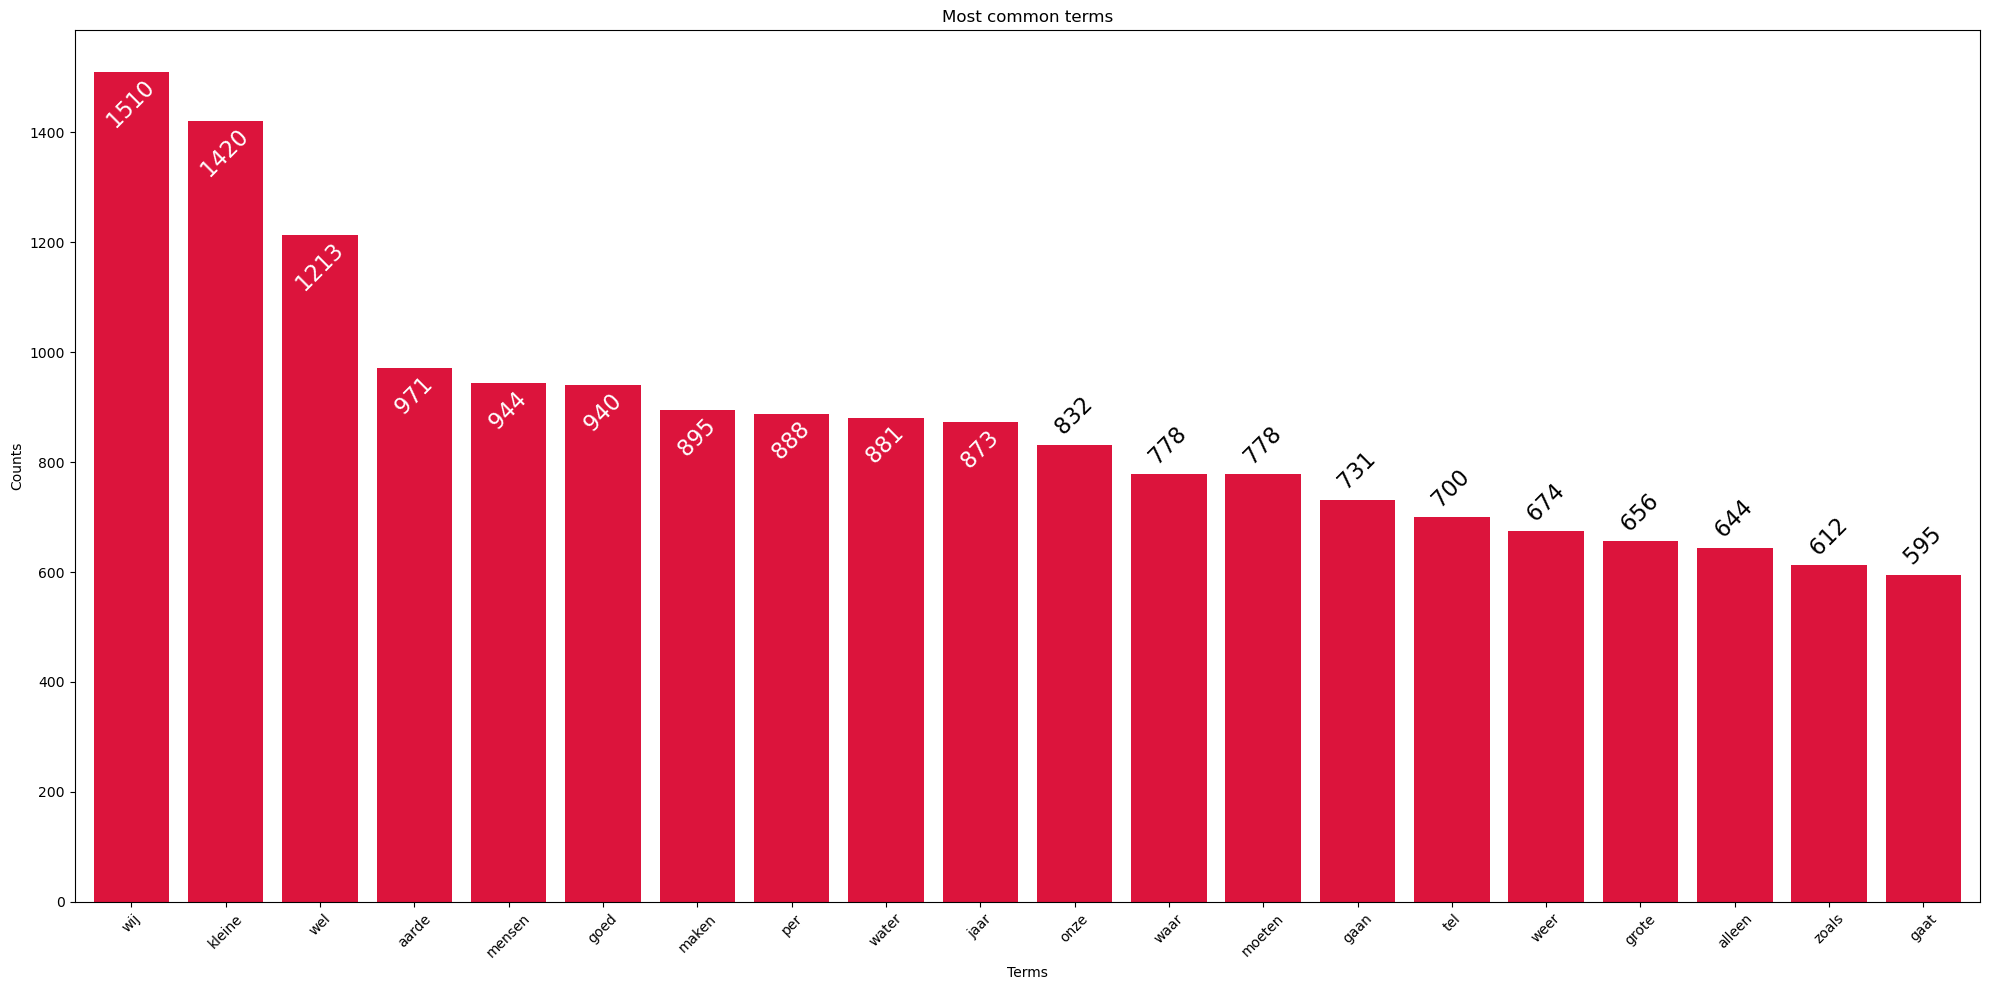

In [33]:
#### From https://stackoverflow.com/questions/63018726/counter-and-plot-the-most-common-word-in-a-text ####

y = [count for word, count in most_common_total]
x = [word for word, count in most_common_total]

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x, y, color='crimson')
plt.title("Most common terms")
plt.ylabel("Counts")
plt.xlabel("Terms")
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
#plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=45)
for i, (word, count) in enumerate(most_common_total):
    plt.text(i, count, f' {count} ', rotation=45, size=16,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.savefig(outdir + '%s_most_common.png' %(save_dataset(dataset)), dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

### Step 8: Visualize most common words in a word cloud

**generate wordcloud**

A word cloud visualizes word frequency, where the size of each word indicates its frequency. You can customize the background color and colormap of the word cloud.

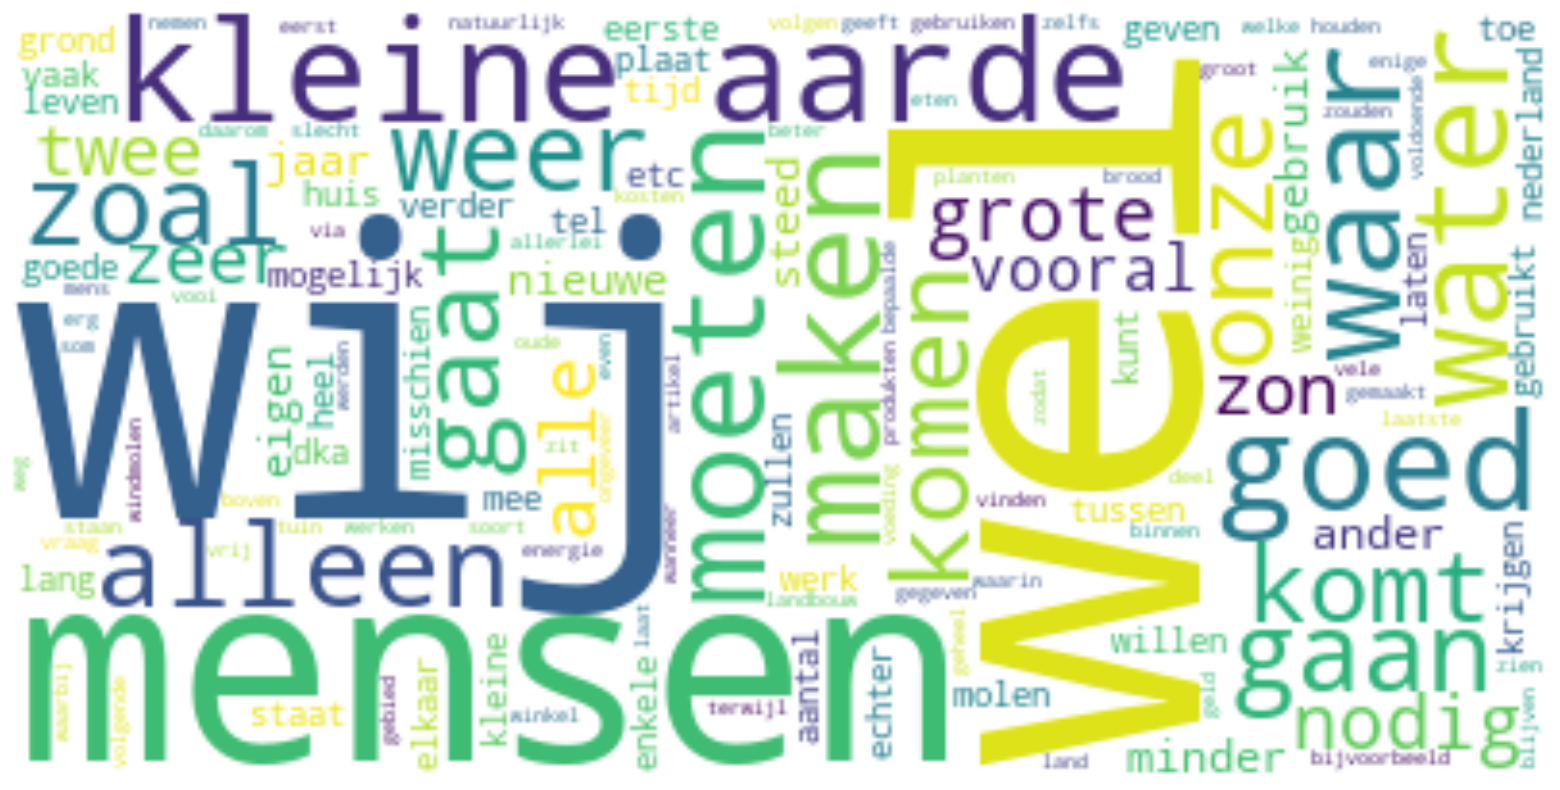

In [45]:
# Generate a word cloud
text_cloud = WordCloud(background_color='white', stopwords=custom_words).generate(input_as_string)

# Display the word cloud
plt.imshow(text_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(outdir + '%s_wordcloud.png' %(save_dataset(dataset)), dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

### Print, save and visualize most common words per dataframe row

In [49]:
with open(outdir + '%s_mostcommon_year.txt' % (save_dataset(dataset)), 'a') as f:
    print('Most common words per year in %s\n' % (dataset), file=f)
    for date, row in zip(data.index, data['text']):
        # Tokenize the text into words
        tokens = row.split()  # Alternatively, use word_tokenize(row) for more accurate tokenization
        cleaned_tokens = remove_user_defined_stopword_list(tokens)  # Apply stopword removal
        word_counts = Counter(cleaned_tokens)  # Count word frequencies
        most_common_words = word_counts.most_common(number_top_words)
        
        print('Most common words in %s:' % (date))
        print('Most common words in %s:' % (date), file=f)
        for word, count in most_common_words:
            print('%s: %7d' % (word, count))
            print('%s: %7d' % (word, count), file=f)
        print('\n')
        print('\n', file=f)

Most common words in 1972:
water:      41
wij:      32
jaar:      24
goed:      22
wel:      21
onze:      17
boer:      17
zon:      17
per:      16
laag:      16
meter:      15
twee:      15
kleine:      14
steeds:      14
gaan:      14
grond:      14
planten:      14
mogelijk:      14
eerste:      14
melk:      14


Most common words in 1972:
wel:      49
wij:      49
onze:      40
waar:      38
water:      34
warmte:      33
komt:      30
kleine:      28
tijd:      28
gaat:      27
per:      26
gaan:      25
plaats:      25
maken:      24
moeten:      24
molen:      24
alleen:      23
jaar:      22
goed:      22
huis:      20


Most common words in 1972:
onze:      26
wij:      26
nodig:      23
maken:      22
mensen:      20
energie:      20
kleine:      19
per:      19
etc:      19
aarde:      18
zoals:      18
tank:      18
lucht:      17
dagen:      17
alleen:      16
jaar:      16
moeten:      16
riethoven:      15
snelheid:      15
wijn:      14


Most common words in 1973:
w

#### Most common words per dataframe row in a bar chart

In [51]:
#### From https://stackoverflow.com/questions/63018726/counter-and-plot-the-most-common-word-in-a-text ####

for date, row, total_words in zip(data.index, data['text'], data['word_count']):
    word_counts = Counter(remove_user_defined_stopword_list(row))
    most_common_words = word_counts.most_common(100)

    y = [count for word, count in most_common_words]
    x = [word for word, count in most_common_words]
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.bar(x, y, color='crimson')
    plt.title("Top term frequencies in " + str(date))
    plt.ylabel("Counts")
    #plt.yscale('log') # optionally set a log scale for the y-axis
    plt.xticks(rotation=45)
    for i, (word, count) in enumerate(most_common_words):
        plt.text(i, count, f' {count} ', rotation=45,
        ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
    plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
    plt.tight_layout() # change the whitespace such that all labels fit nicely
    plt.show()

KeyError: 'word_count'

### **Step 2: Most common words by word length**

In [ ]:
three_words = []
four_words = []
five_words = []
six_words = []
seven_words = []
eight_words = []
nine_words = []
ten_plus_words = []

for word in input_as_list:
    if len(word) == 3:
        three_words.append(word)
    elif len(word) == 4:
        four_words.append(word)
    elif len(word) == 5:
        five_words.append(word)
    elif len(word) == 6:
        six_words.append(word)
    elif len(word) == 7:
        seven_words.append(word)
    elif len(word) == 8:
        eight_words.append(word)
    elif len(word) == 9:
        nine_words.append(word)
    else:
        ten_plus_words.append(word)

In [ ]:
all_word_lists = {'three': three_words, 
                  'four': four_words, 
                  'five': five_words, 
                  'six': six_words, 
                  'seven': seven_words, 
                  'eight': eight_words, 
                  'nine': nine_words, 
                  'ten plus': ten_plus_words}

In [ ]:
frequency_dict = {} # Create dictionary for bar chart below

for number, list in all_word_lists.items():
    frequency_dict[number + " letter words"] = len(list)
    print("There are", len(list), number, "letter words in \'%s\'" %(dataset))

In [ ]:
plt.bar(range(len(frequency_dict)), frequency_dict.values(), align='center')
plt.title("Frequency of different word lenghts in %s" %(dataset))
plt.ylabel("Counts")
plt.xlabel("Word lenghts")
plt.xticks(range(len(frequency_dict)), frequency_dict.keys(), rotation=90)
plt.savefig(outdir + '%s_word_lengths.png' %(save_dataset(dataset)), dpi=200, bbox_inches='tight') # change filename as wished
plt.show()

**Print the n most common words of different lengths**

In [ ]:
def most_common_words(list, n=number_top_words): # number_top_words is defined above
    word_counts = Counter(list)
    top_words = word_counts.most_common(n)
    print('Total number of tokens is: %s' 
          %(len(word_counts))) # to print the total number of unique words of this length
    print('Most frequent words:')
    for word, count in top_words:
        print('%s: %10d' %(word, count))

In [ ]:
most_common_words(ten_plus_words) # change list between brackets to print most frequent words with different length